In [2]:
import pandas as pd
import numpy as np

In [16]:
df=pd.read_csv('C:/Users/Checkout/Documents/Courses/GWAR/Final_Climatic_Data.csv')

In [17]:
df.head()

,LAT,LON,YEAR,MO,DY,T2M,T2MDEW,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M
0,32.75,-124.25,2000,1,1,13.61,9.43,14.13,0.79,14.03,13.25,7.20,75.81,0.02,102.37,7.93,9.20,6.65,2.55,332.65
1,32.75,-123.75,2000,1,1,13.50,9.39,14.07,0.71,13.89,13.18,7.17,76.19,0.03,102.33,8.04,9.36,6.70,2.66,329.88
2,32.75,-123.25,2000,1,1,13.43,9.38,14.12,0.72,13.83,13.11,7.17,76.41,0.03,102.30,8.19,9.56,6.95,2.61,327.08
3,32.75,-122.75,2000,1,1,13.30,9.32,14.03,0.80,13.71,12.90,7.17,76.79,0.02,102.26,8.29,9.81,7.11,2.71,324.39
4,32.75,-122.25,2000,1,1,13.14,9.26,13.84,0.84,13.55,12.70,7.15,77.24,0.01,102.22,8.36,10.11,7.22,2.89,321.39


In [34]:
min_temp=df['WS10M'].mean()
min_temp

3.8619214146022594

In [8]:
Lat1="32.75"
Lon1="-124.25"

In [6]:
from geopy.geocoders import Nominatim

In [13]:
geolocator = Nominatim(user_agent="my_app")
location = geolocator.reverse(Lat1+","+Lon1)
if location is not None:
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    code = address.get('country_code')
    zipcode = address.get('postcode')
    print('City : ', city)
    print('State : ', state)
    print('Country : ', country)
    print('Zip Code : ', zipcode)
else:
    print('Unable to retrieve location data')


AttributeError: 'NoneType' object has no attribute 'raw'

In [14]:
county = []
geolocator = Nominatim(user_agent="my_app")
for row in range(len(df)):
    county.append(geolocator.reverse((df['LAT'][row], df['LON'][row])))
df.insert(index, 'county', county, True)

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=37.75&lon=-118.25&format=json&addressdetails=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000022BBECAD5B0>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))

In [88]:
df=pd.read_csv('C:/Users/Checkout/Documents/Courses/GWAR/Datasets/Cleaned_Merged_County_NDVI.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391221 entries, 0 to 391220
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   county  391221 non-null  object 
 1   dates   391221 non-null  object 
 2   None    391068 non-null  float64
 3   D0-D4   391068 non-null  float64
 4   D1-D4   391068 non-null  float64
 5   D2-D4   391068 non-null  float64
 6   D3-D4   391068 non-null  float64
 7   D4      391068 non-null  float64
 8   DSCI    391068 non-null  float64
dtypes: float64(7), object(2)
memory usage: 26.9+ MB


In [38]:
df.tail()

,county,dates,None,D0-D4,D1-D4,D2-D4,D3-D4,D4,DSCI
391216,Ventura County,2020-12-31,0.0,100.0,98.75,0.00,0.00,0.0,199.0
391217,Siskiyou County,2020-12-31,0.0,100.0,100.00,100.00,88.39,0.0,388.0
391218,Mendocino County,2020-12-31,0.0,100.0,100.00,100.00,48.71,0.0,349.0
391219,Riverside County,2020-12-31,0.0,100.0,74.72,58.97,22.44,0.0,256.0
391220,Glenn County,2020-12-31,0.0,100.0,100.00,100.00,100.00,0.0,400.0


In [39]:
df

,county,dates,None,D0-D4,D1-D4,D2-D4,D3-D4,D4,DSCI
0,San Mateo County,2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Modoc County,2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Glenn County,2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inyo County,2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,San Benito County,2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
391216,Ventura County,2020-12-31,0.0,100.0,98.75,0.00,0.00,0.0,199.0
391217,Siskiyou County,2020-12-31,0.0,100.0,100.00,100.00,88.39,0.0,388.0
391218,Mendocino County,2020-12-31,0.0,100.0,100.00,100.00,48.71,0.0,349.0
391219,Riverside County,2020-12-31,0.0,100.0,74.72,58.97,22.44,0.0,256.0


In [45]:
null_rows = df[df['county'].isnull()]

In [44]:
df.shape

(391221, 9)

In [46]:
null_rows

,county,dates,None,D0-D4,D1-D4,D2-D4,D3-D4,D4,DSCI


In [48]:
min_dr=df['D0-D4'].std()
min_dr

47.490400054229504

In [59]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

def thornthwaite(T, month_days):
    T_avg = np.mean(T)
    if T_avg<=0:
        alpha = 0
        I = 0
        pet = 0
    else:
        alpha = (6.75e-7) * T_avg**7.71
        I = (T**1.514).sum()
        pet = 16 * (10 * T_avg / I) * alpha * month_days
    return pet

def spei(df, months):
    temperature_column = 'T2M'
    precipitation_column = 'PRECTOTCORR'
    county_column = 'county'

    df['date'] = pd.to_datetime(df['Date'])
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year

    grouped = df.groupby([county_column, 'year', 'month'])

    spei_values = []

    for (county, year, month), group in grouped:
        precipitation_sum = group[precipitation_column].sum()
        month_days = group.shape[0]
        T = group[temperature_column].values
        PET = thornthwaite(T, month_days)

        climatic_water_balance = precipitation_sum - PET
        
        spei_monthly = climatic_water_balance

        spei_values.append({
            'county': county,
            'year': year,
            'month': month,
            'SPEI': spei_monthly
        })

    spei_df = pd.DataFrame(spei_values)
    return spei_df

# Read the CSV file
file_path = 'C:/Users/Checkout/Documents/Courses/GWAR/Datasets/Cleaned_Merged_County_NDVI.csv'
data = pd.read_csv(file_path)

data["Date"] = pd.to_datetime(data["Date"])

# Calculate the monthly SPEI for each county
spei_data = spei(data, months=1) # You can set 'months' to any desired aggregation level

print(spei_data)

C:\Users\Checkout\AppData\Local\Temp\ipykernel_2616\2679200589.py:13: RuntimeWarning: invalid value encountered in power
  I = (T**1.514).sum()


               county  year  month          SPEI
0      Alameda County  2000      1 -8.966181e+02
1      Alameda County  2000      2 -1.707234e+03
2      Alameda County  2000      3 -2.214437e+03
3      Alameda County  2000      4 -1.076904e+04
4      Alameda County  2000      5 -3.670303e+04
...               ...   ...    ...           ...
19412     Yuma County  2020      8 -1.644371e+07
19413     Yuma County  2020      9 -8.083185e+06
19414     Yuma County  2020     10 -1.833614e+06
19415     Yuma County  2020     11 -1.396089e+05
19416     Yuma County  2020     12 -9.100495e+03

[19417 rows x 4 columns]


In [54]:
df.dtypes

LAT            float64
LON            float64
T2M            float64
T2MDEW         float64
TS             float64
T2M_RANGE      float64
T2M_MAX        float64
T2M_MIN        float64
QV2M           float64
RH2M           float64
PRECTOTCORR    float64
PS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WD10M          float64
Date            object
county          object
ndvi_value     float64
dtype: object

In [56]:
# convert column to float and check for non-float values
non_float_values = df[pd.to_numeric(df['PRECTOTCORR'], errors='coerce').isnull()]['PRECTOTCORR'].tolist()
if len(non_float_values) > 0:
    print(f"The following values are not float: {', '.join(non_float_values)}")
else:
    print("All values are float.")

All values are float.


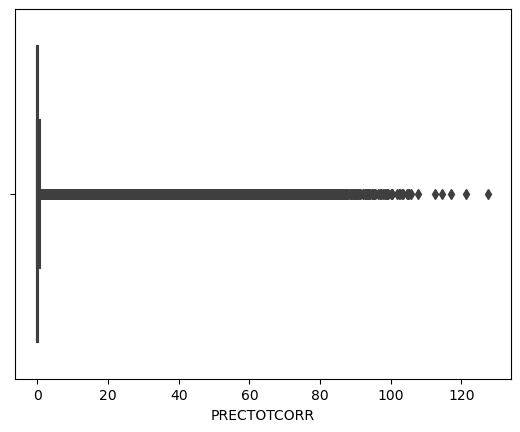

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plot of tips
sns.boxplot(x=df["PRECTOTCORR"])

# Show plot
plt.show()

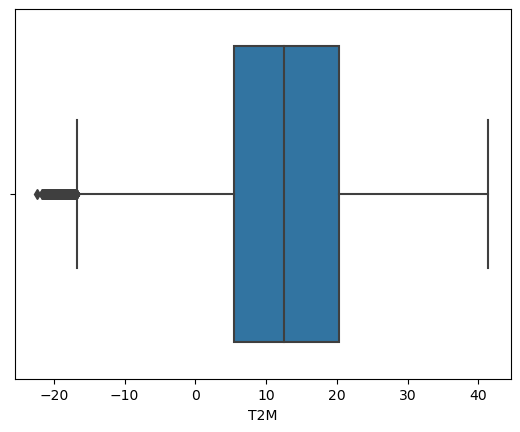

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plot of tips
sns.boxplot(x=df["T2M"])

# Show plot
plt.show()


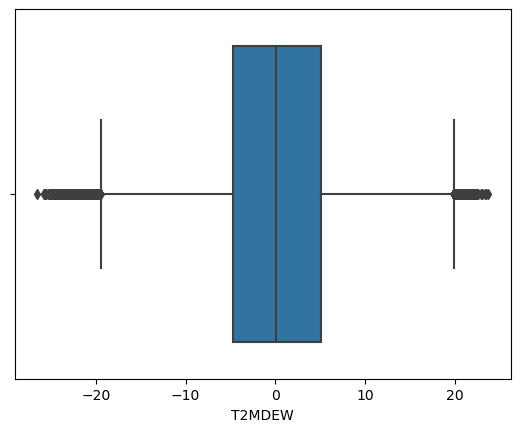

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plot of tips
sns.boxplot(x=df["T2MDEW"])

# Show plot
plt.show()

In [90]:
import pandas as pd
import numpy as np

# create a sample dataframe
#df = pd.DataFrame({'col1': [1,2,3,4,5,6,7,8,9,10,100]})

# calculate the z-score for each value in the column
z_scores = np.abs((df['T2MDEW'] - df['T2MDEW'].mean()) / df['T2MDEW'].std())

# identify outliers by setting a threshold z-score value
threshold = 3
outliers = df[z_scores > threshold]
print(outliers)
# remove outliers from the original dataframe
df = df[z_scores <= threshold]


           LAT     LON    T2M  T2MDEW     TS  T2M_RANGE  T2M_MAX  T2M_MIN  \
66508    32.75 -114.75  30.23   20.26  31.44       8.37    34.50    26.13   
155936   32.75 -114.75  30.49   20.24  31.92      10.00    36.92    26.92   
156219   32.75 -114.75  29.49   20.41  30.53       7.32    33.37    26.05   
156224   33.25 -114.75  29.04   20.14  30.36       6.84    32.71    25.88   
164709   32.75 -114.75  32.81   19.97  35.06      11.46    39.04    27.58   
...        ...     ...    ...     ...    ...        ...      ...      ...   
2252082  37.75 -116.75  -0.60  -20.55  -1.54      11.14     6.31    -4.83   
2252083  37.75 -116.25  -0.33  -20.54  -1.26      11.32     6.47    -4.85   
2252084  37.75 -115.75  -0.91  -19.88  -1.96      12.07     6.03    -6.05   
2252100  38.25 -116.75  -2.05  -19.80  -3.04      11.35     4.73    -6.61   
2252101  38.25 -116.25  -1.74  -19.77  -2.86      11.87     4.75    -7.13   

          QV2M   RH2M  PRECTOTCORR     PS  WS10M  WS10M_MAX  WS10M_MIN  \
6

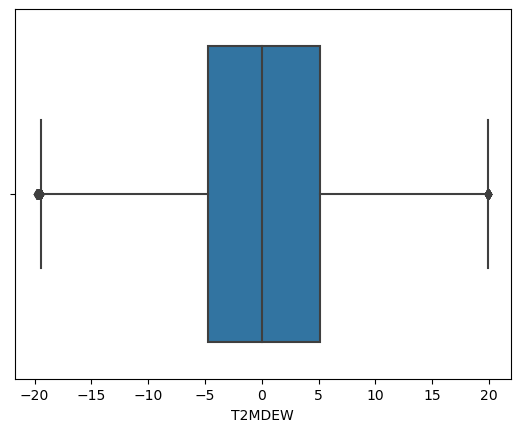

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plot of tips
sns.boxplot(x=df["T2MDEW"])

# Show plot
plt.show()

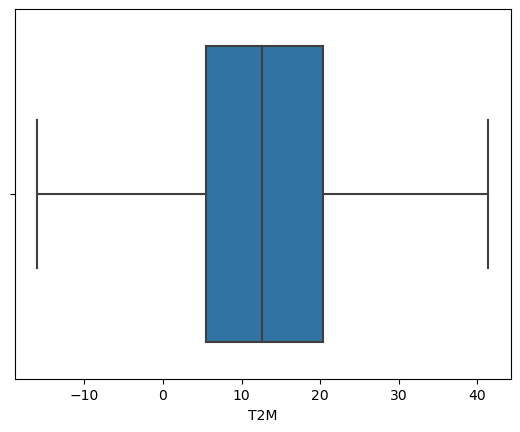

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plot of tips
sns.boxplot(x=df["T2M"])

# Show plot
plt.show()

MemoryError: 

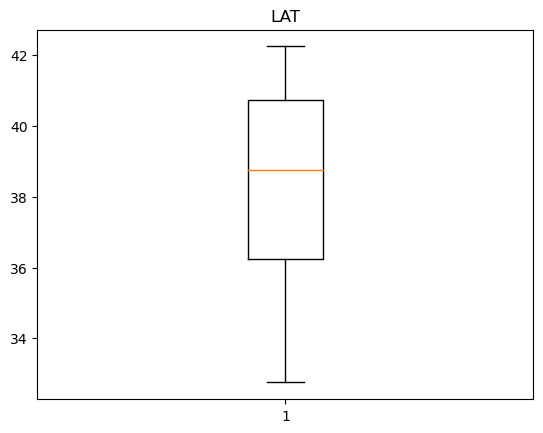

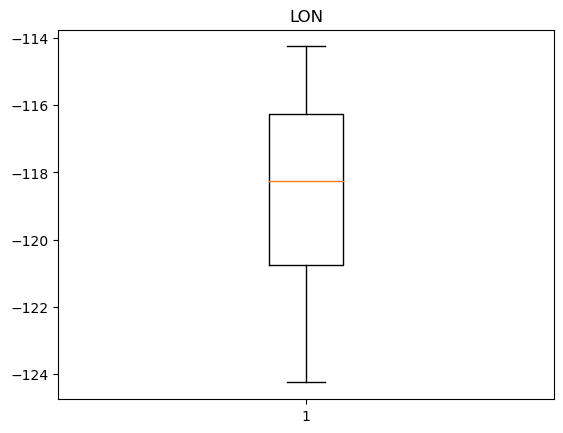

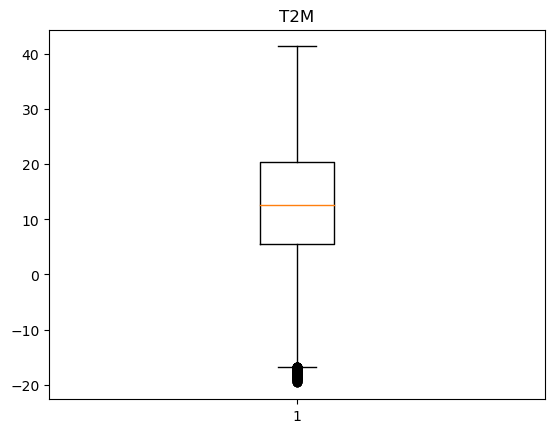

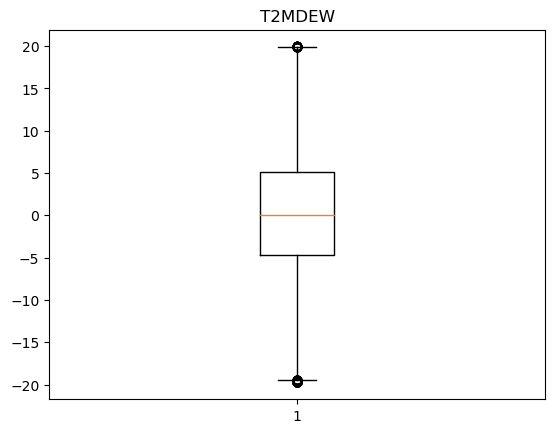

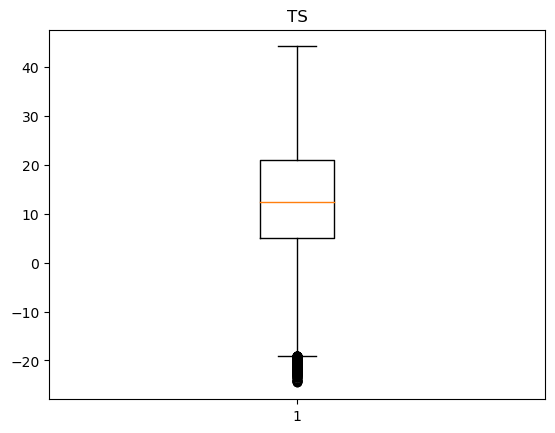

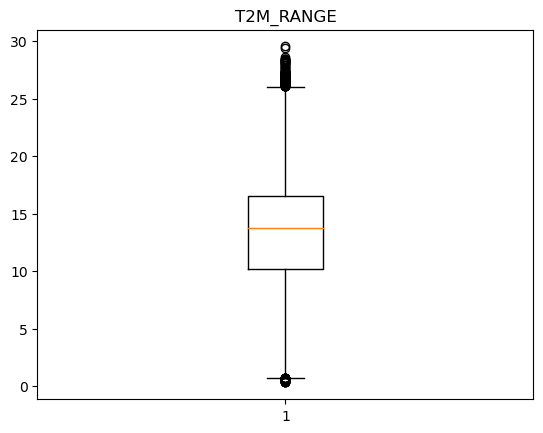

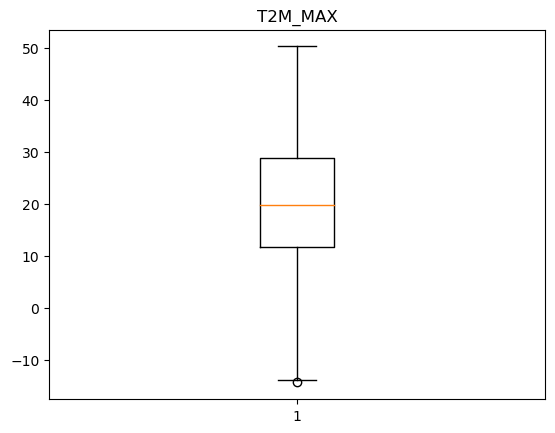

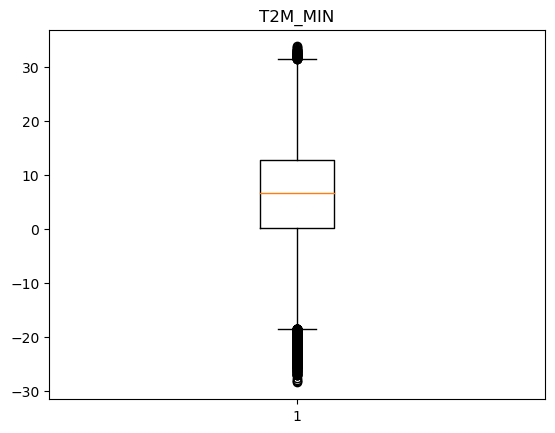

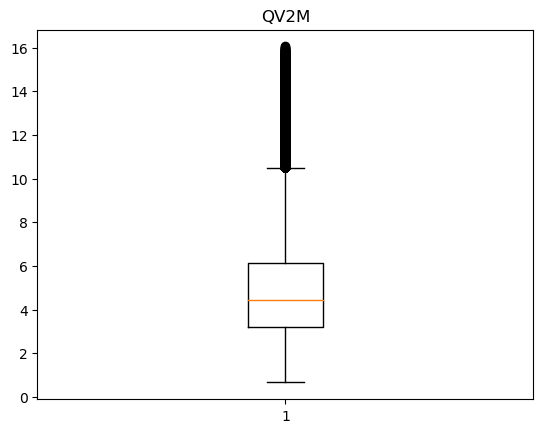

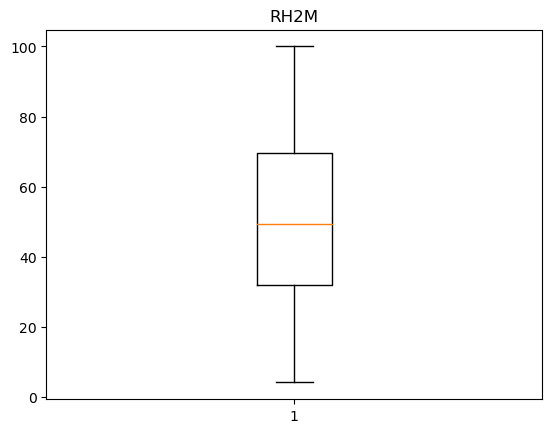

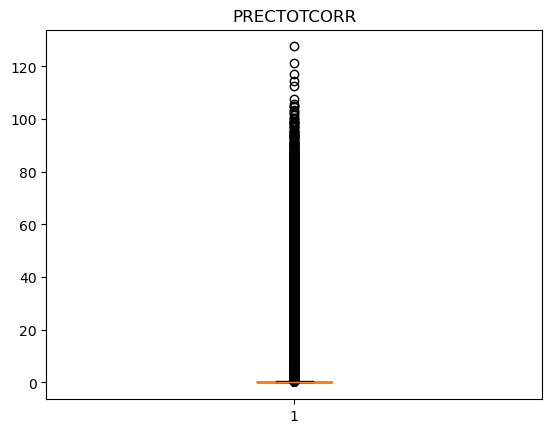

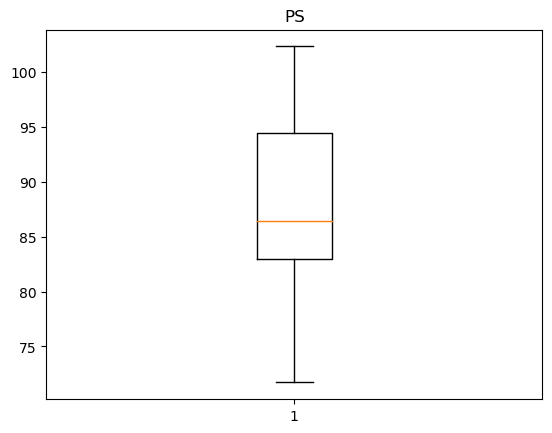

MemoryError: In RendererAgg: Out of memory

<Figure size 640x480 with 1 Axes>

MemoryError: In RendererAgg: Out of memory

<Figure size 640x480 with 1 Axes>

MemoryError: In RendererAgg: Out of memory

<Figure size 640x480 with 1 Axes>

MemoryError: In RendererAgg: Out of memory

<Figure size 640x480 with 1 Axes>

MemoryError: In RendererAgg: Out of memory

<Figure size 640x480 with 1 Axes>

MemoryError: In RendererAgg: Out of memory

<Figure size 640x480 with 1 Axes>

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

# load your dataframe
# df = pd.read_csv("your_data.csv")

# create a box plot for each column in the dataframe
for col in df.columns:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(col)
    
# display all the box plots
plt.show()


In [3]:
df1=pd.read_csv('C:/Users/Checkout/Documents/Courses/GWAR/Datasets/Cleaned_Merged_County_NDVI.csv')

In [4]:
df1.head()

,LAT,LON,T2M,T2MDEW,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,Date,county,ndvi_value
0,32.75,-117.25,10.76,7.87,11.82,1.99,11.95,9.96,6.70,82.53,2.48,99.26,5.32,7.53,4.08,3.44,271.98,2000-01-01,San Diego County,-0.062434
1,32.75,-116.75,8.18,5.92,8.79,3.75,10.66,6.92,6.09,86.21,2.92,95.74,5.37,7.21,3.96,3.25,263.85,2000-01-01,San Diego County,-0.062434
2,32.75,-115.75,10.52,4.86,10.55,10.83,17.27,6.44,5.46,71.68,0.75,99.15,5.00,6.82,3.94,2.88,263.25,2000-01-01,Imperial County,-0.062434
3,32.75,-114.75,10.90,4.27,10.52,12.00,17.97,5.96,5.19,67.88,0.10,100.10,2.94,4.76,1.59,3.17,265.37,2000-01-01,Imperial County,-0.062434
4,33.25,-117.25,9.22,6.88,10.04,3.18,11.19,8.01,6.40,85.76,3.57,97.36,4.88,6.94,3.55,3.40,262.98,2000-01-01,San Diego County,-0.062434


In [5]:
df2=pd.read_csv('C:/Users/Checkout/Documents/Courses/GWAR/Drought Data/Alameda County.csv')

In [6]:
df2.head()

,Week,None,D0-D4,D1-D4,D2-D4,D3-D4,D4,DSCI
0,2023-04-18,100.0,0.0,0.0,0.0,0.0,0.0,0
1,2023-04-11,100.0,0.0,0.0,0.0,0.0,0.0,0
2,2023-04-04,100.0,0.0,0.0,0.0,0.0,0.0,0
3,2023-03-28,100.0,0.0,0.0,0.0,0.0,0.0,0
4,2023-03-21,100.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# convert date columns to datetime type
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Week'] = pd.to_datetime(df2['Week'])

# concatenate the two date columns into a single dataframe
df_concat = pd.concat([df1, df2], ignore_index=True)

# create a scatter plot of the concatenated date column
plt.scatter(df_concat.index, df_concat['Date'])

# set the x-axis ticks and labels
plt.xticks(ticks=df_concat.index, labels=df_concat['Date'].dt.strftime('%Y-%m-%d'), rotation=90)

# set the axis labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Comparison of Date Points')

# show the plot
plt.show()
